In [ ]:
                                        Avocado Project

Project Overview:
    
This project analyzes and predicts avocado sales data by the classification and regression. 
The dataset contains weekly retail scan data for Hass avocados from 2018, including information on price, volume sold, 
and type of avocado (conventional or organic). The primary objectives are:

Classification: Predict whether an avocado is conventional or organic.
Regression: Predict the average price of avocados

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
           1       1.00      1.00      1.00      3001

    accuracy                           1.00      3294
   macro avg       1.00      1.00      1.00      3294
weighted avg       1.00      1.00      1.00      3294

NaN values in features:
 Total Volume                  14951
4046                          14951
4225                          14951
4770                          14951
Total Bags                    14951
Small Bags                    14951
Large Bags                    14951
XLarge Bags                   14951
year                          14951
region_Atlanta                    0
region_BaltimoreWashington        0
region_Boise                      0
region_Boston                     0
region_BuffaloRochester           0
region_California                 0
region_Charlotte                  0
region_Chicago                    0
region_Colum

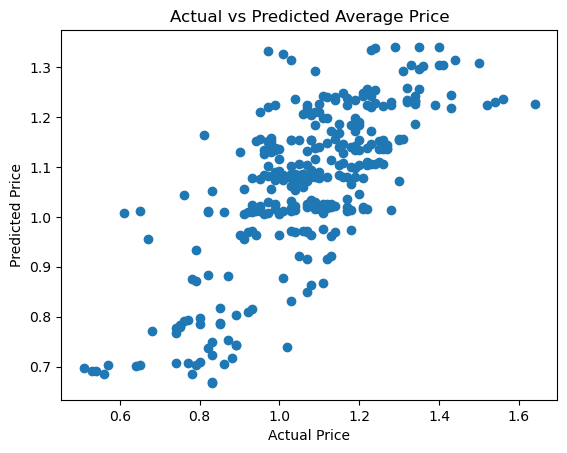

In [11]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, classification_report
from sklearn.impute import SimpleImputer

# Load dataset
url = 'https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv'
data = pd.read_csv(url)

# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'])

# Convert the 'Date' column to datetime format, specifying dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Label encode the 'type' column for classification
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])  # 0 for 'conventional', 1 for 'organic'

# One-Hot Encoding for the 'Region' column (turning categorical text into numerical form)
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Classification Task: Predict whether the avocado is organic or conventional (type)
X_class = data.drop(columns=['type', 'AveragePrice', 'Date'])  # Features
y_class = data['type']  # Target (organic vs conventional)

# Train-Test Split for Classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Build Random Forest Classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_class, y_train_class)

# Prediction and Evaluation (Classification)
y_pred_class = classifier.predict(X_test_class)
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

# Regression Task: Predict the Average Price of avocados
X_reg = data.drop(columns=['AveragePrice', 'type', 'Date'])  # Features
y_reg = data['AveragePrice']  # Target

# Check for NaN values in target and features
print("NaN values in features:\n", X_reg.isna().sum())
print("NaN values in target:\n", y_reg.isna().sum())

# Remove rows with NaN in target
data = data.dropna(subset=['AveragePrice'])

# Re-define features and target after removing NaNs
X_reg = data.drop(columns=['AveragePrice', 'type', 'Date'])
y_reg = data['AveragePrice']

# Impute missing values in features using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Filling NaN with the mean value
X_reg = imputer.fit_transform(X_reg)

# Train-Test Split for Regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Build a Linear Regression Model
regressor = LinearRegression()
regressor.fit(X_train_reg, y_train_reg)

# Prediction and Evaluation (Regression)
y_pred_reg = regressor.predict(X_test_reg)

# Calculate Mean Squared Error and RMSE
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"RMSE (Regression): {rmse}")

# Plot actual vs predicted AveragePrice
plt.scatter(y_test_reg, y_pred_reg)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Average Price')
plt.show()


In [ ]:
Dataset
The dataset is sourced from the Hass Avocado Board and includes the following columns:

Date: The date of the observation.
AveragePrice: The average price of a single avocado.
type: Type of avocado (conventional or organic).
year: The year of observation.
Region: The region of the observation.
Total Volume: Total number of avocados sold.
4046, 4225, 4770: Total number of avocados sold with respective PLU codes.
The dataset URL: Avocado Dataset

Tasks:
    
1. Classification
Objective: Predict the type of avocado (conventional or organic).

Process:

Convert Date to datetime format.
Encode the type column to numerical values.
One-hot encode the Region column.
Train a Random Forest Classifier to predict avocado type.
Evaluate the model using classification metrics such as precision, recall, and F1-score.

2. Regression
Objective: Predict the average price of avocados.

Process:

Drop columns that are not required for prediction (Date, type).
Handle missing values in features using mean imputation.
Train a Linear Regression model to predict AveragePrice.
Evaluate the model using metrics such as Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).
Plot actual vs. predicted prices to visualize performance.

Results
Classification: Achieved high accuracy with a Random Forest Classifier. Detailed classification metrics show that the model 
is effective in distinguishing between conventional and organic avocados.
Regression: The Linear Regression models performance was evaluated using RMSE. The scatter plot of actual vs. predicted prices
helps in visualizing the models accuracy.

Conclusion
The project successfully demonstrates the application of classification and regression models on avocado sales data. 
The Random Forest Classifier effectively predicts avocado types, and the Linear Regression model provides insights into 
price predictions.